Problem statement- The data has been assessed from two angles-first is price and second is region

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder

In [5]:
df=pd.read_csv("Avacado_Dataset")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [6]:
#Importing the dataset

In [7]:
df.shape

(16468, 14)

In [8]:
#Checking the shape(There are 16468 rows and 14 columns )

In [9]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df=df.dropna(axis=0)

In [11]:
#Dropping the null values from the dataset

In [12]:
df.shape

(1517, 14)

In [13]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

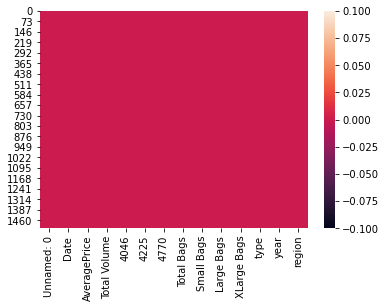

In [14]:
sns.heatmap(df.isnull())

In [15]:
#no null values exits in the dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 177.8+ KB


In [17]:
#Checking the data type of the columns
#Date and region is object type rest are in float type

In [18]:
import datetime

In [19]:
df['Month'] = pd.to_datetime(df['Date'])
df['Month'] = df['Month'].dt.month

In [20]:
#made a sperate column with just month

In [21]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11


In [22]:
df.drop(df.columns[0],axis=1,inplace=True)

In [23]:
#Dropping the column Unnamed:as it is more of serial number

In [24]:
df = df[["AveragePrice","Month","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags","type","region"]]
df.head()

,AveragePrice,Month,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,12,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1.35,12,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,0.93,12,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,1.08,6,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,1.28,11,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [25]:
#reordering the data set

In [26]:
df['type'].unique()

array(['conventional'], dtype=object)

In [27]:
#type has only one value, so we can go head and drop as there will be no correlation but still we check in the correlation before dropping

In [28]:
df['Month']=df['Month'].astype(int)
df['Month'].head(2)

0    12
1    12
Name: Month, dtype: int32

In [29]:
#converting the month to int

In [30]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [31]:
#checking the unique values of the region

In [32]:
le=LabelEncoder()


In [33]:
df['type'] = le.fit_transform(df['type'].astype(str))
df['type'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: type, dtype: int32

In [34]:
df['region'] = le.fit_transform(df['region'].astype(str))
df['region'].head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [35]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [36]:
#Converted region and type through labelEncoding

In [37]:
df.head()

,AveragePrice,Month,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,12,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,12,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,12,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,6,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,11,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0


In [38]:
dfcor=df.corr()
dfcor

,AveragePrice,Month,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
AveragePrice,1.000000,0.060642,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,-0.229408
Month,0.060642,1.000000,-0.055212,-0.053007,-0.058429,-0.055079,-0.047747,-0.048978,-0.039242,0.021452,NaN,0.000977
Total Volume,-0.140470,-0.055212,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,0.236579
4046,-0.190096,-0.053007,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,0.269481
4225,-0.092084,-0.058429,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,0.215733
4770,-0.100567,-0.055079,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.138092
Total Bags,-0.111597,-0.047747,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.190001
Small Bags,-0.097682,-0.048978,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.168650
Large Bags,-0.177480,-0.039242,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,0.297452
XLarge Bags,-0.048284,0.021452,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,-0.046144


In [39]:
#with target column average price, we see there is weak correlation with 4225,4770,Small Bags

In [40]:
col=['type','XLarge Bags','Month','4225']
df=df.drop(col,axis=1)

In [41]:
dfcorr=df.corr()
dfcorr

,AveragePrice,Total Volume,4046,4770,Total Bags,Small Bags,Large Bags,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.100567,-0.111597,-0.097682,-0.177480,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.934347,0.967689,0.960642,0.910226,0.236579
4046,-0.190096,0.985568,1.000000,0.898570,0.930395,0.922278,0.884229,0.269481
4770,-0.100567,0.934347,0.898570,1.000000,0.926405,0.923607,0.840523,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.926405,1.000000,0.997341,0.911336,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.923607,0.997341,1.000000,0.879131,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.840523,0.911336,0.879131,1.000000,0.297452
region,-0.229408,0.236579,0.269481,0.138092,0.190001,0.168650,0.297452,1.000000


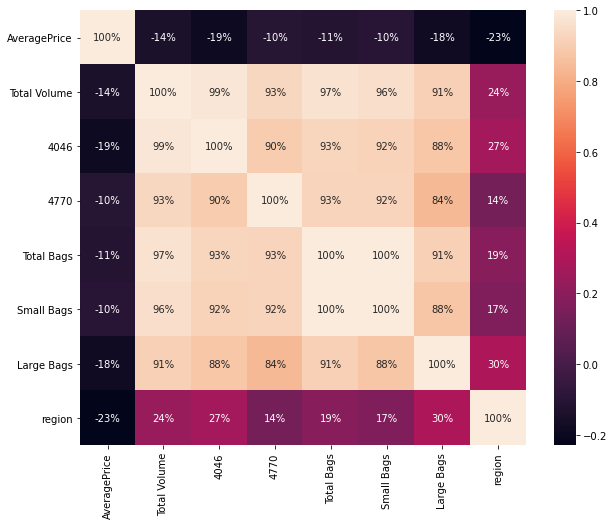

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcorr,annot=True,fmt='.0%')
plt.show()

In [43]:
#if we see average price does not have good correlation with any of its attribute

# Visualization

<AxesSubplot:xlabel='region', ylabel='Total Volume'>

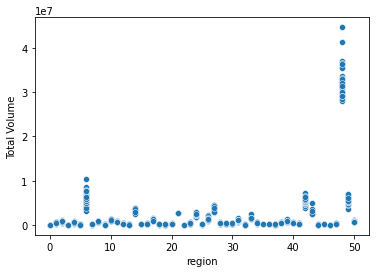

In [44]:
sns.scatterplot(x='region',y='Total Volume',data=df)

In [45]:
# there seems to be outliers in the last zone of the region-50

<AxesSubplot:xlabel='Total Volume', ylabel='Total Bags'>

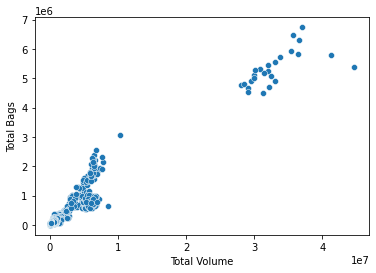

In [46]:
sns.scatterplot(x='Total Volume',y='Total Bags',data=df)

In [47]:
#there seems to be good correlation between total volumne and total bags

<AxesSubplot:xlabel='Total Volume', ylabel='Large Bags'>

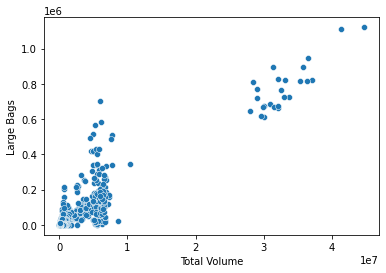

In [48]:
sns.scatterplot(x="Total Volume",y="Large Bags",data=df)

In [49]:
#there seems to be good correlation between total volumne and Large bags

<AxesSubplot:xlabel='Total Volume', ylabel='Small Bags'>

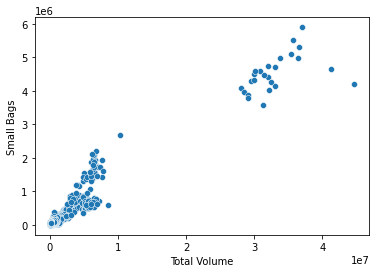

In [50]:
sns.scatterplot(x="Total Volume",y="Small Bags",data=df)

In [51]:
#there seems to be good correlation between total volumne and small bags

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

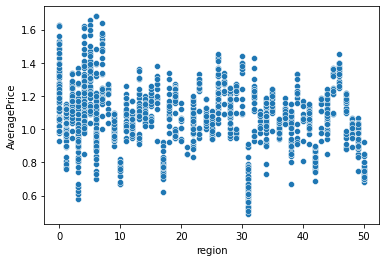

In [52]:
sns.scatterplot(x='region',y='AveragePrice',data=df)

In [53]:
#The data is more or less uniform in nature


In [54]:
df.describe()

,AveragePrice,Total Volume,4046,4770,Total Bags,Small Bags,Large Bags,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,16.132398
min,0.490000,3.875074e+04,4.677200e+02,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,50.000000


In [55]:
#There seems to be outliers present in the dataset
#There is significant difference between mean and median

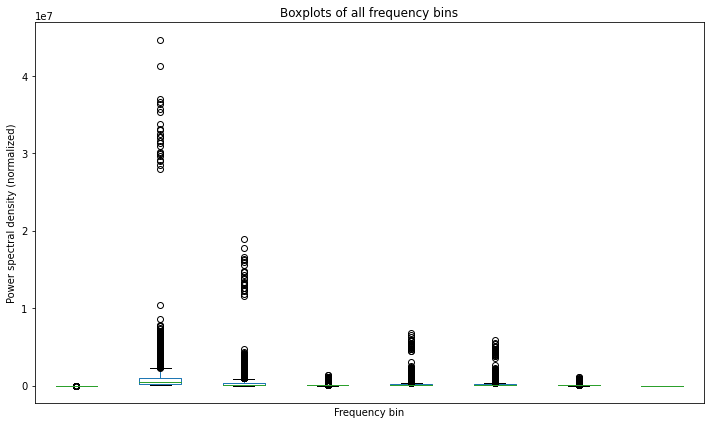

In [56]:
df.plot.box(figsize=(12,7), xticks=[])
plt.title('Boxplots of all frequency bins')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')
plt.show()

In [57]:
#Outliers exists in more or less each column so we cannot remove outliers

In [58]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
region          0.288146
dtype: float64

In [59]:
#Skewness exits in majority of the columns

In [60]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1517, 8)

In [61]:
np.where(z>3)

(array([ 412,  760, 1059, 1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183,
        1183, 1183, 1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
        1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186, 1186,
        1187, 1187, 1187, 1187, 1187, 1187, 1188, 1188, 1188, 1188, 1188,
        1188, 1189, 1189, 1189, 1189, 1189, 1189, 1190, 1190, 1190, 1190,
        1190, 1190, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
        1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1194, 1194,
        1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195, 1195, 1195, 1196,
        1196, 1196, 1196, 1196, 1196, 1197, 1197, 1197, 1197, 1197, 1197,
        1198, 1198, 1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199,
        1199, 1200, 1200, 1200, 1200, 1200, 1200, 1201, 1201, 1201, 1201,
        1201, 1201, 1202, 1202, 1202, 1202, 1202, 1202, 1203, 1203, 1203,
        1203, 1203, 1203, 1204, 1204, 1204, 1204, 1204, 1204, 1205, 1205,
        1205, 1205, 1205, 1205, 1206, 

In [62]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1517, 8)
(1471, 8)


In [63]:
percentageloss=(((1517-1436)/1517)*100)
percentageloss

5.339485827290705

In [64]:
#checked the percentage loss of data,as it is small dataset and dataset has outliers in general, hence we would not be remove the outliers

In [65]:
#Splitting the dataset into x and y

In [66]:
x=df.iloc[:,1:]
x.head()

,Total Volume,4046,4770,Total Bags,Small Bags,Large Bags,region
0,64236.62,1036.74,48.16,8696.87,8603.62,93.25,0
1,54876.98,674.28,58.33,9505.56,9408.07,97.49,0
2,118220.22,794.70,130.50,8145.35,8042.21,103.14,0
3,78992.15,1132.00,72.58,5811.16,5677.40,133.76,0
4,51039.60,941.48,75.78,6183.95,5986.26,197.69,0


In [67]:
y=df.iloc[:,:1]
y.head()

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28


In [68]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [69]:
#removing the skewness of the dataset

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.        , -1.75773609, -1.67587799, ..., -1.84758646,
        -1.07217152, -1.82850904],
       [ 0.        , -1.91955712, -1.61993388, ..., -1.74842585,
        -1.06246056, -1.82850904],
       [ 0.        , -1.8579956 , -1.37585802, ..., -1.92354129,
        -1.05008145, -1.82850904],
       ...,
       [ 0.        , -0.23510209,  0.39772065, ..., -0.11613719,
         0.20708331, -0.75962031],
       [ 0.        , -0.16955396,  0.41649687, ..., -0.08229667,
         0.20796776, -0.75962031],
       [ 0.        , -0.26581784,  0.39332617, ..., -0.05714515,
         0.33465765, -0.75962031]])

In [71]:
#scaling the dataset and importing the algorithms below for test and train

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [73]:
lr=LinearRegression()

In [74]:
from sklearn.model_selection import train_test_split




In [75]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"Best accuracy {accu*100} found on random state {best_rstate}")
        

Best accuracy 42.11976766555877 found on random state 151


In [76]:
#The best accuracy is 42 with random state 151

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=151)

In [78]:
#Training the model

In [79]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"Accuracy {r2score*100},Cross_val_score={cvscore*100} & difference ={(cvscore*100)-(r2score*100)}")

Accuracy 42.11976766555877,Cross_val_score=28.63862193210321 & difference =-13.481145733455559


In [80]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy {r2score*100},Cross_val_score={cvscore*100} & difference ={(cvscore*100)-(r2score*100)}")

Accuracy 42.11976766555877,Cross_val_score=74.55647276478793 & difference =32.43670509922916


In [81]:
from sklearn.linear_model import SGDRegressor
SGD= SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"Accuracy {r2score*100},Cross_val_score={cvscore*100} & difference ={(cvscore*100)-(r2score*100)}")

Accuracy 42.11976766555877,Cross_val_score=28.63862193210321 & difference =-13.481145733455559


In [82]:
#LinearRegression and SGDRegressor seems to give the best score and the difference between accuracy and cross_val_score is min

In [83]:
parameters= {"max_iter":[500,700,900,1100,1200,1300,1400,1500],
            "alpha":[0.0001,0.001,0.01,1,10,100],
            "penalty":["elasticnet"]}

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
GCV=GridSearchCV(SGDRegressor(),parameters,cv=5,scoring='r2')
GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)
print("Final accuracy :",r2_score(y_test,GCV_pred)*100)

Final accuracy : 39.97666353954256


In [86]:
#Passing the GridSearchCV to fine tune and the score is 39.92

# With second Target# Region

In [87]:
df.head()

,AveragePrice,Total Volume,4046,4770,Total Bags,Small Bags,Large Bags,region
0,1.33,64236.62,1036.74,48.16,8696.87,8603.62,93.25,0
1,1.35,54876.98,674.28,58.33,9505.56,9408.07,97.49,0
2,0.93,118220.22,794.70,130.50,8145.35,8042.21,103.14,0
3,1.08,78992.15,1132.00,72.58,5811.16,5677.40,133.76,0
4,1.28,51039.60,941.48,75.78,6183.95,5986.26,197.69,0


In [88]:
#checking the dataset and splitting the dataset into x and y

In [89]:
x=df.iloc[:,:-1]
x.head()

,AveragePrice,Total Volume,4046,4770,Total Bags,Small Bags,Large Bags
0,1.33,64236.62,1036.74,48.16,8696.87,8603.62,93.25
1,1.35,54876.98,674.28,58.33,9505.56,9408.07,97.49
2,0.93,118220.22,794.70,130.50,8145.35,8042.21,103.14
3,1.08,78992.15,1132.00,72.58,5811.16,5677.40,133.76
4,1.28,51039.60,941.48,75.78,6183.95,5986.26,197.69


In [90]:
y=df.iloc[:,-1:]
y.head()

,region
0,0
1,0
2,0
3,0
4,0


In [91]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [92]:
#checking the unique values of the target column and importing the algorithms

In [93]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [94]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    MB=MultinomialNB()
    MB.fit(x_train,y_train)
    y_pred=MB.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"Best accuracy {accu*100} found on random state {best_rstate}")

Best accuracy 68.42105263157895 found on random state 34


In [95]:
#the best accuracy score is 68 found on the random state 34

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=128)

In [97]:
model=[SVC(kernel='rbf'),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),MultinomialNB()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm)*100)
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print(cross_val_score(m,x,y,cv=5).mean()*100)
    print('**********************************************')
    print('\n')

Accuracy score of SVC() is:
21.710526315789476
[[ 0  0  0 ...  0  0  0]
 [ 0  1  2 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.50      0.17      0.25         6
           2       0.19      1.00      0.31        11
           3       0.07      1.00      0.12        11
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        14
           6       0.63      0.55      0.59        22
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0

76.40416015285739
**********************************************


Accuracy score of AdaBoostClassifier() is:
15.789473684210526
[[ 0  0  0 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  5 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         6
           2       0.06      1.00      0.11        11
           3       0.00      0.00      0.00        11
           4       0.15      0.79      0.25        14
           5       0.00      0.00      0.00        14
           6       0.70      0.86      0.78        22
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00        12
          12

In [98]:
#DecisionTreeClassifier()gives the best accuracy score 87

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
dt=DecisionTreeClassifier()


In [101]:
parameters={'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [102]:
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 8}


In [103]:
pred=clf.predict(x_test)
print("Final accuracy :",accuracy_score(y_test,pred)*100)

Final accuracy : 86.8421052631579


In [104]:
#The final accuracy score has gone upto 87 

In [105]:
import joblib
filename='model.pkl'
joblib.dump(clf,open(filename,'wb'))

In [106]:
#saving the file